In [1]:
# Pagrindinės bibliotekos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Vizualizacijai, atkreipkite dėmesį, kad naudojame "matplotlib" pagrindu
import warnings
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
import sqlite3

# Duomenų modeliavimas ir analizė
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Darbas su interneto naršyklėmis per Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Įspėjimų ignoravimas
warnings.filterwarnings('ignore')

# Specializuoti moduliai
from numpy.polynomial import Polynomial

import json
from sklearn.preprocessing import StandardScaler
from datetime import timedelta

In [2]:
import json

with open(r'C:\Users\Pauliussl\Paskaita88\skirstomi_vart.json', 'r') as file:
    sikrstomi_vart = json.load(file)

with open(r'C:\Users\Pauliussl\Paskaita88\stambus_vart.json', 'r') as file:
    stambus_vart = json.load(file)

with open(r'C:\Users\Pauliussl\Paskaita88\orai.json', 'r') as file:
    orai = json.load(file)   


df_sikrstomi_vart = pd.DataFrame(sikrstomi_vart)
df_stambus_vart = pd.DataFrame(stambus_vart)
orai = pd.DataFrame(orai)



In [3]:
df_sikrstomi_vart  = df_sikrstomi_vart.drop(columns='utc')
df_sikrstomi_vart

,id,value,ltu
0,1101,683.070,2023-01-01 02:00:00
1,1101,656.493,2023-01-01 03:00:00
2,1101,639.742,2023-01-01 04:00:00
3,1101,641.163,2023-01-01 05:00:00
4,1101,662.840,2023-01-01 06:00:00
...,...,...,...
18473,1101,1391.453,2025-02-08 19:00:00
18474,1101,1337.626,2025-02-08 20:00:00
18475,1101,1264.340,2025-02-08 21:00:00
18476,1101,1180.428,2025-02-08 22:00:00


In [4]:
df_stambus_vart = df_stambus_vart.drop(columns='utc')

In [5]:
df = pd.concat([df_sikrstomi_vart, df_stambus_vart])
df['ltu'] = pd.to_datetime(df['ltu'])
sorted_df = df[(df['ltu'] >= '2023-01-01') & (df['ltu'] <= '2024-01-01')].sort_values('ltu')
sorted_df

,id,value,ltu
0,1101,683.070,2023-01-01 02:00:00
0,1102,91.465,2023-01-01 02:00:00
1,1102,91.878,2023-01-01 03:00:00
1,1101,656.493,2023-01-01 03:00:00
2,1101,639.742,2023-01-01 04:00:00
...,...,...,...
8756,1101,0.000,2023-12-31 22:00:00
8757,1102,0.000,2023-12-31 23:00:00
8757,1101,0.000,2023-12-31 23:00:00
8758,1101,933.678,2024-01-01 00:00:00


In [6]:
orai = orai[['obs_time_utc','air_temperature', 'wind_speed','cloud_cover']]
orai['cloud_cover'] = pd.to_numeric(orai['cloud_cover'], errors='coerce')
cloud_cover_vidurk = orai['cloud_cover'].mean()
orai['cloud_cover'].fillna(value=cloud_cover_vidurk, inplace=True)
orai

,obs_time_utc,air_temperature,wind_speed,cloud_cover
0,2023-01-01 00:00:00,7.7,3.9,88.0
1,2023-01-01 01:00:00,8.2,4.6,100.0
2,2023-01-01 02:00:00,8.8,4.6,100.0
3,2023-01-01 03:00:00,8.8,3.6,100.0
4,2023-01-01 04:00:00,8.8,2.7,100.0
...,...,...,...,...
8779,2024-01-01 19:00:00,-3.5,3.4,100.0
8780,2024-01-01 20:00:00,-3.6,2.8,100.0
8781,2024-01-01 21:00:00,-3.8,3.0,100.0
8782,2024-01-01 22:00:00,-4.1,3.9,100.0


In [7]:
sorted_df['ltu'] = pd.to_datetime(sorted_df['ltu'])
orai['obs_time_utc'] = pd.to_datetime(orai['obs_time_utc'])
df_bendra = pd.merge(sorted_df, orai, left_on='ltu', right_on='obs_time_utc')

In [24]:
df_bendra 
df_bendra['ltu'] = pd.to_datetime(df_bendra['ltu'])
df_bendra['metai'] = df_bendra['ltu'].dt.year
df_bendra['menuo'] = df_bendra['ltu'].dt.month
df_bendra['diena'] = df_bendra['ltu'].dt.day
df_bendra['valanda'] = df_bendra['ltu'].dt.hour
# df_bendra = df_bendra.groupby('ltu')['value'].sum().reset_index()

df_bendra

,id,value,ltu,obs_time_utc,air_temperature,wind_speed,cloud_cover,metai,menuo,diena,valanda
0,1101,683.070,2023-01-01 02:00:00,2023-01-01 02:00:00,8.8,4.6,100.0,2023,1,1,2
1,1102,91.465,2023-01-01 02:00:00,2023-01-01 02:00:00,8.8,4.6,100.0,2023,1,1,2
2,1102,91.878,2023-01-01 03:00:00,2023-01-01 03:00:00,8.8,3.6,100.0,2023,1,1,3
3,1101,656.493,2023-01-01 03:00:00,2023-01-01 03:00:00,8.8,3.6,100.0,2023,1,1,3
4,1101,639.742,2023-01-01 04:00:00,2023-01-01 04:00:00,8.8,2.7,100.0,2023,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
17513,1101,0.000,2023-12-31 22:00:00,2023-12-31 22:00:00,0.0,1.6,100.0,2023,12,31,22
17514,1102,0.000,2023-12-31 23:00:00,2023-12-31 23:00:00,-0.2,1.4,100.0,2023,12,31,23
17515,1101,0.000,2023-12-31 23:00:00,2023-12-31 23:00:00,-0.2,1.4,100.0,2023,12,31,23
17516,1101,933.678,2024-01-01 00:00:00,2024-01-01 00:00:00,-0.3,1.5,100.0,2024,1,1,0


In [9]:
# Susplitiname duomenis
X = df_bendra[['menuo', 'diena', 'valanda', 'air_temperature', 'wind_speed', 'cloud_cover']]
y = df_bendra['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
df_bendra

,id,value,ltu,obs_time_utc,air_temperature,wind_speed,cloud_cover,metai,menuo,diena,valanda
0,1101,683.070,2023-01-01 02:00:00,2023-01-01 02:00:00,8.8,4.6,100.0,2023,1,1,2
1,1102,91.465,2023-01-01 02:00:00,2023-01-01 02:00:00,8.8,4.6,100.0,2023,1,1,2
2,1102,91.878,2023-01-01 03:00:00,2023-01-01 03:00:00,8.8,3.6,100.0,2023,1,1,3
3,1101,656.493,2023-01-01 03:00:00,2023-01-01 03:00:00,8.8,3.6,100.0,2023,1,1,3
4,1101,639.742,2023-01-01 04:00:00,2023-01-01 04:00:00,8.8,2.7,100.0,2023,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
17513,1101,0.000,2023-12-31 22:00:00,2023-12-31 22:00:00,0.0,1.6,100.0,2023,12,31,22
17514,1102,0.000,2023-12-31 23:00:00,2023-12-31 23:00:00,-0.2,1.4,100.0,2023,12,31,23
17515,1101,0.000,2023-12-31 23:00:00,2023-12-31 23:00:00,-0.2,1.4,100.0,2023,12,31,23
17516,1101,933.678,2024-01-01 00:00:00,2024-01-01 00:00:00,-0.3,1.5,100.0,2024,1,1,0


In [ ]:
import pandas as pd

# Assuming df_bendra is already loaded
sausio_faktas = df_bendra
sausio_faktas['ltu'] = pd.to_datetime(sausio_faktas['ltu'])

# Filter for January 1, 2024
jan_1_data = sausio_faktas[(sausio_faktas['ltu'] >= '2024-01-01') & (sausio_faktas['ltu'] < '2024-01-02')]

# Check the unique hours present
unique_hours = jan_1_data['ltu'].dt.hour.unique()
print("Unique hours in the data for January 1, 2024:", unique_hours)


Unique hours in the data for January 1, 2024: [0]


In [44]:
# Sausio fakto patikra 
sausio_faktas = df
sausio_faktas['ltu'] = pd.to_datetime(sausio_faktas['ltu'])
filtered_df = sausio_faktas[(sausio_faktas['ltu'] >= '2024-01-01') & (sausio_faktas['ltu'] < '2024-01-02')]
vidurkiai = filtered_df.groupby('ltu').mean('values')
vidurkiai

,value
ltu,
2024-01-01 00:00:00,512.7930
2024-01-01 01:00:00,498.9585
2024-01-01 02:00:00,490.8335
2024-01-01 03:00:00,474.2070
2024-01-01 04:00:00,460.7685
2024-01-01 05:00:00,461.0280
2024-01-01 06:00:00,466.5640
2024-01-01 07:00:00,477.3720
2024-01-01 08:00:00,489.1365


In [11]:
# 2 modeliai 

busimos_datos = pd.DataFrame({ 
    'ltu': pd.date_range(start=df_bendra['ltu'].max() + timedelta(hours=1), periods=24, freq='H')
})

busimos_datos['metai'] = busimos_datos['ltu'].dt.year
busimos_datos['menuo'] = busimos_datos['ltu'].dt.month
busimos_datos['diena'] = busimos_datos['ltu'].dt.day
busimos_datos['valanda'] = busimos_datos['ltu'].dt.hour
busimos_datos['air_temperature'] = 6   ## numatomas
busimos_datos['cloud_cover'] = 80    ## numatomas
busimos_datos['wind_speed'] = 3    ## numatomas

X = df_bendra[['menuo', 'diena', 'valanda', 'air_temperature', 'wind_speed', 'cloud_cover']]
y = df_bendra['value']

# Linijine 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
prognoze_lin = lin_reg.predict(busimos_datos[['menuo', 'diena', 'valanda', 'air_temperature', 'wind_speed', 'cloud_cover']])
busimos_datos['Linijine'] = prognoze_lin

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
prognoze_rf = rf.predict(busimos_datos[['menuo', 'diena', 'valanda', 'air_temperature', 'wind_speed', 'cloud_cover']])
busimos_datos['RandomForest'] = prognoze_rf

busimos_datos[['ltu', 'Linijine', 'RandomForest']]

,ltu,Linijine,RandomForest
0,2024-01-01 01:00:00,474.289100,380.382428
1,2024-01-01 02:00:00,481.240377,381.219078
2,2024-01-01 03:00:00,488.191655,380.522094
3,2024-01-01 04:00:00,495.142933,377.604100
4,2024-01-01 05:00:00,502.094211,393.667294
5,2024-01-01 06:00:00,509.045489,450.315826
6,2024-01-01 07:00:00,515.996767,564.097808
7,2024-01-01 08:00:00,522.948044,590.640149
8,2024-01-01 09:00:00,529.899322,617.214879
9,2024-01-01 10:00:00,536.850600,628.106169


In [38]:
# Sujungiame 'busimos_datos' ir 'averages' lenteles pagal stulpelį 'ltu'
line_reg_fact = pd.merge(busimos_datos, averages, on='ltu', how='left')
line_reg_fact = line_reg_fact[['ltu', 'Linijine', 'RandomForest', 'value']]
line_reg_fact

,ltu,Linijine,RandomForest,value
0,2024-01-01 01:00:00,474.289100,380.382428,498.9585
1,2024-01-01 02:00:00,481.240377,381.219078,490.8335
2,2024-01-01 03:00:00,488.191655,380.522094,474.2070
3,2024-01-01 04:00:00,495.142933,377.604100,460.7685
4,2024-01-01 05:00:00,502.094211,393.667294,461.0280
5,2024-01-01 06:00:00,509.045489,450.315826,466.5640
6,2024-01-01 07:00:00,515.996767,564.097808,477.3720
7,2024-01-01 08:00:00,522.948044,590.640149,489.1365
8,2024-01-01 09:00:00,529.899322,617.214879,500.0435
9,2024-01-01 10:00:00,536.850600,628.106169,522.4805


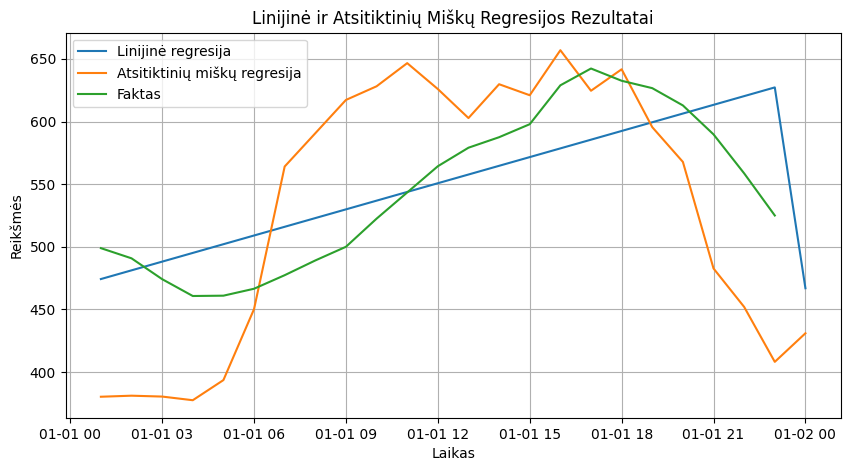

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(line_reg_fact['ltu'], line_reg_fact['Linijine'], label='Linijinė regresija')
plt.plot(line_reg_fact['ltu'], line_reg_fact['RandomForest'], label='Atsitiktinių miškų regresija')
plt.plot(line_reg_fact['ltu'], line_reg_fact['value'], label='Faktas')
plt.xlabel('Laikas')
plt.ylabel('Reikšmės')
plt.title('Linijinė ir Atsitiktinių Miškų Regresijos Rezultatai')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
busimos_datos

,ltu,metai,menuo,diena,valanda,air_temperature,cloud_cover,wind_speed,Linijine,RandomForest
0,2024-01-01 01:00:00,2024,1,1,1,6,80,3,474.289100,380.382428
1,2024-01-01 02:00:00,2024,1,1,2,6,80,3,481.240377,381.219078
2,2024-01-01 03:00:00,2024,1,1,3,6,80,3,488.191655,380.522094
3,2024-01-01 04:00:00,2024,1,1,4,6,80,3,495.142933,377.604100
4,2024-01-01 05:00:00,2024,1,1,5,6,80,3,502.094211,393.667294
5,2024-01-01 06:00:00,2024,1,1,6,6,80,3,509.045489,450.315826
6,2024-01-01 07:00:00,2024,1,1,7,6,80,3,515.996767,564.097808
7,2024-01-01 08:00:00,2024,1,1,8,6,80,3,522.948044,590.640149
8,2024-01-01 09:00:00,2024,1,1,9,6,80,3,529.899322,617.214879
9,2024-01-01 10:00:00,2024,1,1,10,6,80,3,536.850600,628.106169


In [55]:
busimos_datos = pd.DataFrame({ 
    'ltu': pd.date_range(start=df_bendra['ltu'].max() + timedelta(hours=1), periods=24, freq='H')
})

####
# Sukurkite 24 valandų laiko seką:

### `start=` - nurodo sekos pradžios datą ir laiką. Pradžia yra df_bendra['ltu'].max() + timedelta(hours=1),
# tai reiškia, kad pradžios laikas yra nustatomas kaip paskutinė df_bendra DataFrame laiko žyma, prie kurios pridedama viena valanda,
# leidžiant pradėti seką iš karto po paskutinio turimo įrašo.

### `periods=24` - nurodo, kiek datų elementų turi būti sugeneruota, atitinka vieną parą valandų skaičiumi.

### `freq='H'` - nurodo intervalo dažnį, kur 'H' reiškia, kad kiekvienas elementas bus vienos valandos intervalu,
# tai reiškia, kad kiekviena nauja data bus viena valanda po ankstesnės.
####

busimos_datos['metai'] = busimos_datos['ltu'].dt.year
busimos_datos['menuo'] = busimos_datos['ltu'].dt.month
busimos_datos['diena'] = busimos_datos['ltu'].dt.day
busimos_datos['valanda'] = busimos_datos['ltu'].dt.hour
busimos_datos['air_temperature'] = 8   ### prognozuojama oro temperatura
busimos_datos['cloud_cover'] = 100   ### prognozuojamas cloud cover

# Prisitraukiame vidurkius pagala men/diena/val

# Vidurkiu prognoze 
class Averager:
    def __init__(self):
        self.men_diena_valanda_avg = None
        self.global_avg = None

    def fit(self, df_bendra):
        self.men_diena_valanda_avg = df_bendra.groupby(['menuo', 'diena', 'valanda'])['value'].mean().reset_index()
        self.global_avg = df_bendra['value'].mean()

    def predict(self, busimos_datos):
        prognoze_vidurkis = pd.merge(busimos_datos, self.men_diena_valanda_avg, on=['menuo', 'diena', 'valanda'], how='left')
        prognoze_vidurkis['value'].fillna(self.global_avg, inplace=True)
        return prognoze_vidurkis[['ltu', 'value']]

averager = Averager()
averager.fit(df_bendra)
prognoze = averager.predict(busimos_datos)
print(prognoze)

                   ltu       value
0  2024-01-01 01:00:00  535.625808
1  2024-01-01 02:00:00  387.267500
2  2024-01-01 03:00:00  374.185500
3  2024-01-01 04:00:00  365.641000
4  2024-01-01 05:00:00  366.811000
5  2024-01-01 06:00:00  378.353000
6  2024-01-01 07:00:00  385.660500
7  2024-01-01 08:00:00  388.622000
8  2024-01-01 09:00:00  393.044000
9  2024-01-01 10:00:00  418.505500
10 2024-01-01 11:00:00  440.758000
11 2024-01-01 12:00:00  458.174500
12 2024-01-01 13:00:00  466.179500
13 2024-01-01 14:00:00  474.761000
14 2024-01-01 15:00:00  487.157500
15 2024-01-01 16:00:00  514.677500
16 2024-01-01 17:00:00  527.038000
17 2024-01-01 18:00:00  521.001500
18 2024-01-01 19:00:00  514.334500
19 2024-01-01 20:00:00  499.043500
20 2024-01-01 21:00:00  477.849000
21 2024-01-01 22:00:00  444.181500
22 2024-01-01 23:00:00  410.677000
23 2024-01-02 00:00:00  388.582500


In [56]:
line_reg_fact2 = pd.merge(prognoze, vidurkiai, on='ltu', how='left')
line_reg_fact2

,ltu,value_x,value_y
0,2024-01-01 01:00:00,535.625808,498.9585
1,2024-01-01 02:00:00,387.267500,490.8335
2,2024-01-01 03:00:00,374.185500,474.2070
3,2024-01-01 04:00:00,365.641000,460.7685
4,2024-01-01 05:00:00,366.811000,461.0280
5,2024-01-01 06:00:00,378.353000,466.5640
6,2024-01-01 07:00:00,385.660500,477.3720
7,2024-01-01 08:00:00,388.622000,489.1365
8,2024-01-01 09:00:00,393.044000,500.0435
9,2024-01-01 10:00:00,418.505500,522.4805


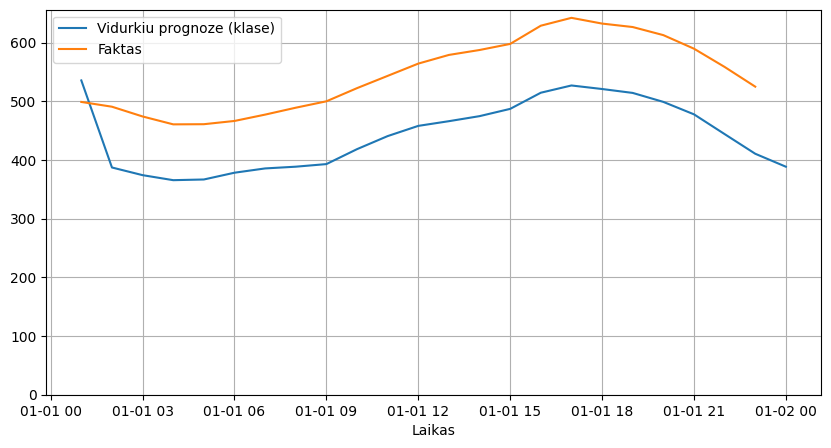

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(line_reg_fact2['ltu'], line_reg_fact2['value_x'], label='Vidurkiu prognoze (klase)')
plt.plot(line_reg_fact2['ltu'], line_reg_fact2['value_y'], label='Faktas')
plt.xlabel('Laikas')
plt.legend()
plt.grid(True)
plt.ylim(0)
plt.show()